# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
universe = G10_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [4]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

In [5]:
neer = read_prices("../../Dymon/Code Data/NEER.csv")

In [6]:
neer.columns = [x[0] for x in neer.columns]

In [7]:
g10_neer = neer[[("JBDN"+x+" Index") for x in [x[3:] for x in G10_FX]]]
g10_neer.columns = G10_FX

In [8]:
g10_neer_cleaned = g10_neer.pipe(fill_date, True).pipe(omit_trailing_na)

# Data integrity

In [7]:
g10_neer_cleaned.pipe(fill_date).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5645 entries, 2000-01-03 to 2021-08-20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2Y      5644 non-null   float64
 1   5Y      5644 non-null   float64
dtypes: float64(2)
memory usage: 132.3 KB


<AxesSubplot:>

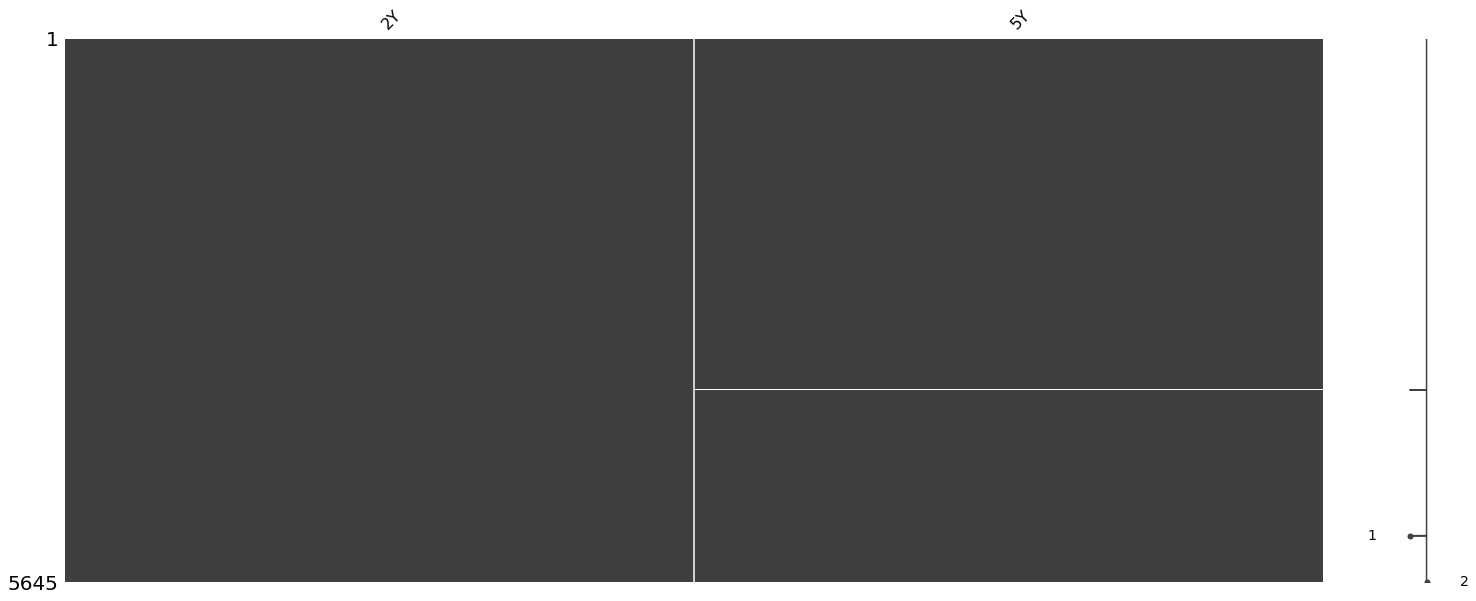

In [8]:
msmx(g10_neer_cleaned.pipe(fill_date))

# Signal 

In [26]:
sig = g10_neer_cleaned.pipe(demean, 252*5).pipe(demean_xs).pipe(top_bottom_xs, 3)

In [27]:
b = Backtest(signal = sig, asset_returns = total_returns, tcost = abs(total_returns*0), settings = s)
b.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [28]:
bt_obj = b

In [29]:
get_summary(bt_obj)

Returns   : 0.0001948043290988899
Vol       : 0.11337615616163665
SR        : 0.0017182125033517964
Max DD    : -33.98
Hit rate  : 0.494
W | N | L : 0.49 | 0.0 | 0.51
W/L Ratio : 0.98


In [30]:
get_returns_stats(bt_obj.asset_rtn, b.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF
annualized_return,0.21164,-0.389896,0.739434,0.787739,-2.666335,1.317775,0.049511,0.052876,-0.089373
sharpe,0.083172,-0.134726,0.363066,0.192259,-0.514075,0.360277,0.032264,0.034652,-0.020277
dollar_sharpe,0.071402,-0.15619,0.348123,0.187322,-0.532243,0.348389,0.024814,0.026843,-0.045575
trade_sharpe,-0.115305,-0.261889,0.372554,0.139236,-0.577338,0.361304,-0.165959,-0.091953,-0.070355
long_sharpe,-0.208812,-0.524479,0.487708,1.213688,-0.067465,0.554374,0.229507,0.597477,-0.036793
short_sharpe,-0.024525,0.018121,0.549224,-0.197626,-1.006454,0.280646,-0.553251,-0.172242,-0.431529
sortino,0.04663,-0.056211,0.169185,0.102686,-0.267598,0.170245,0.010102,0.012857,-0.007517
max_drawdown,-7.509836,-19.592244,-5.909849,-19.840708,-53.979937,-8.514069,-5.61304,-8.698114,-25.794006
max_drawdown_start,2006-03-28,2005-06-09,2011-07-26,2008-07-15,2005-05-05,2013-08-30,2005-06-17,2013-10-24,2008-11-21
max_drawdown_end,2007-07-25,2007-11-06,2012-07-24,2010-05-18,2015-06-05,2014-07-09,2005-11-16,2016-01-06,2011-08-09


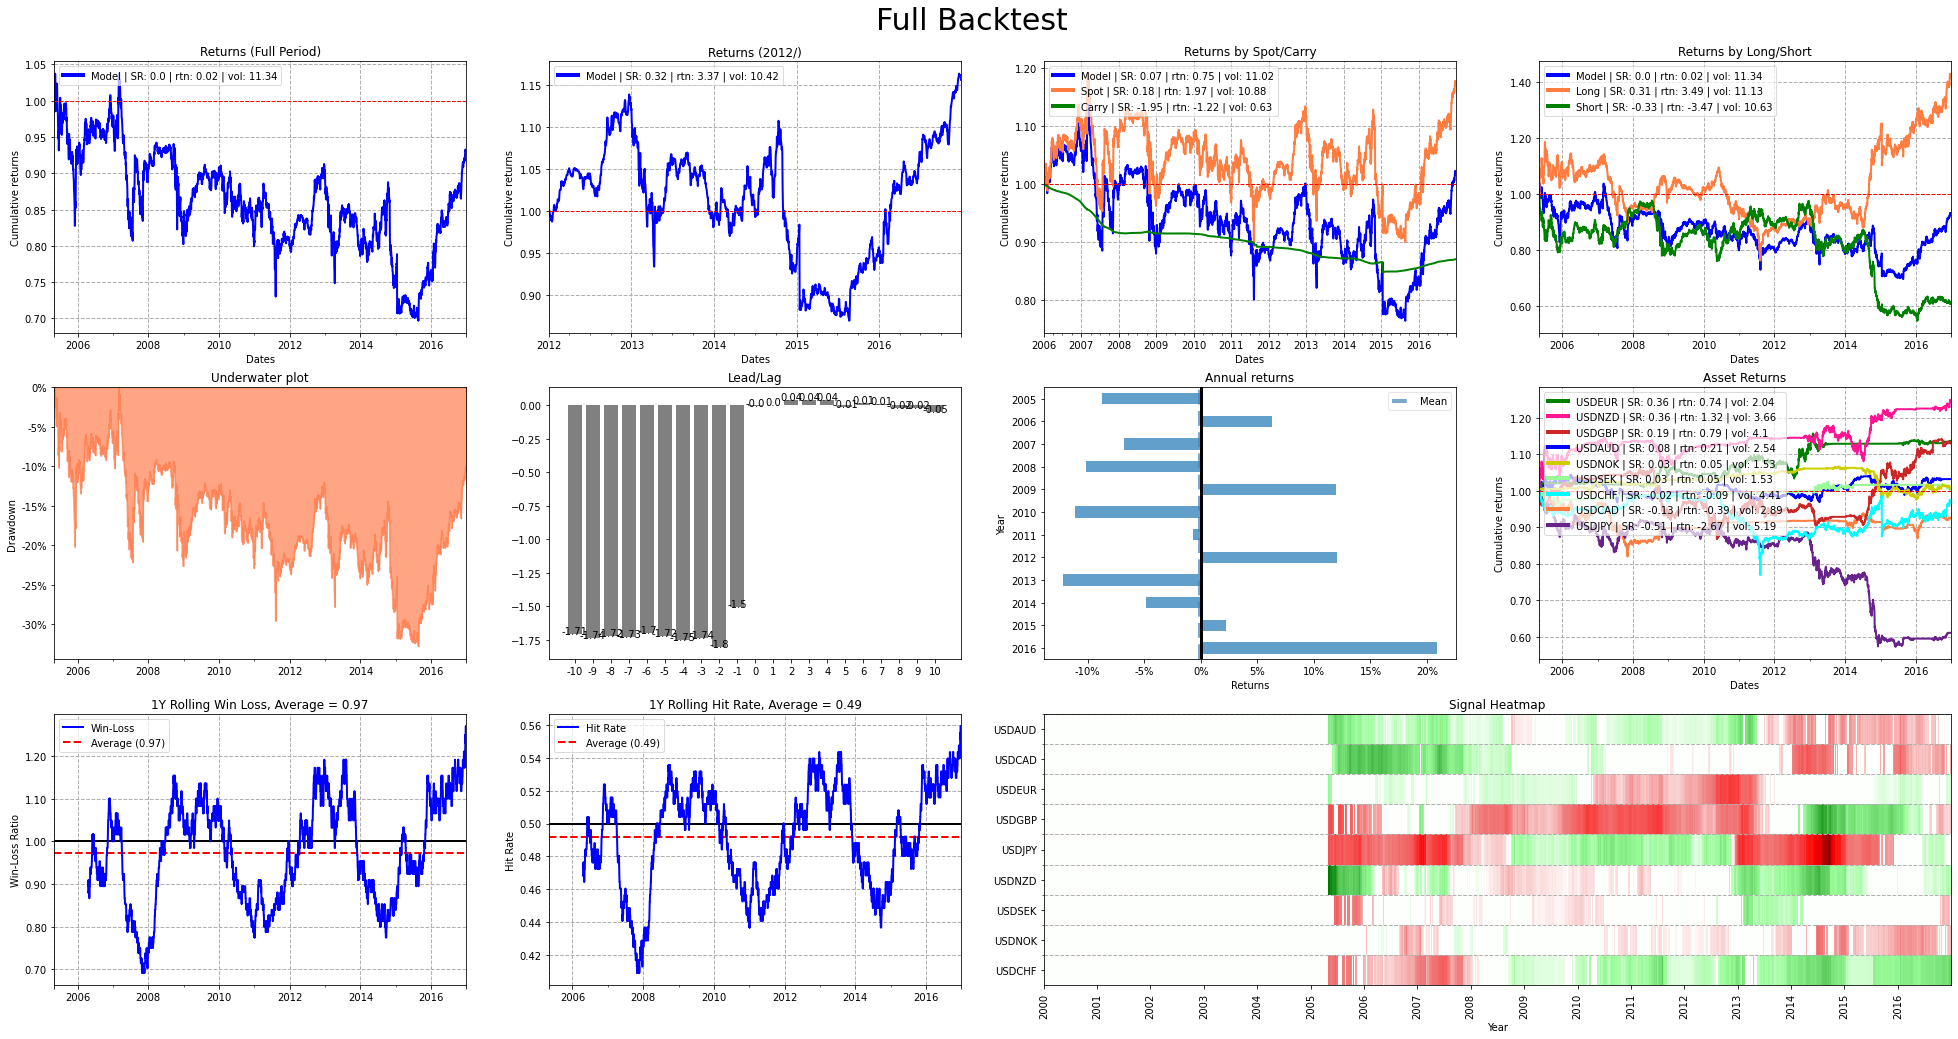

In [31]:
plot_bt(bt_obj)

In [ ]:
pf.plot_monthly_returns_dist(bt_obj.model_rtn)

In [ ]:
gs = GridSpec(nrows = 2, ncols = 2)
fig = plt.figure(figsize=(20, 15))
fig.suptitle(t="Full Backtest", fontsize=30, y=.925)

fig.add_subplot(gs[0]).set_label(gen_plot_rtn(bt_obj.model_rtn, main = "Returns (Full Period)"))
fig.add_subplot(gs[1]).set_label(gen_rtn_asset(bt_obj))
fig.add_subplot(gs[2]).set_label(pf.plot_drawdown_underwater(bt_obj.model_rtn))
fig.add_subplot(gs[3]).set_label(gen_rtn_longshort(bt_obj))

In [ ]:
# gen_rtn_longshort(bt_obj)
# gen_rtn_component(bt_obj, spot_rtns, carry_rtns)
# gen_leadlag(b, nlag=20)
# gen_rolling_hitrate(bt_obj.model_rtn)
# gen_rolling_winloss(bt_obj.model_rtn)
# pf.plot_monthly_returns_dist(bt_obj.model_rtn)
# pf.plot_annual_returns(bt_obj.model_rtn)
# gen_signal(bt_obj)
# gen_rtn_asset(bt_obj)
# gen_plot_rtn(bt_obj.model_rtn["2012":])
# gen_rolling_sharpe(bt_obj.model_rtn)
# gen_rtn_col_component(bt_obj, spot_rtns, carry_rtns)
# gen_rtn_col_longshort(bt_obj)

In [ ]:
def band_filter(series):
  return series.applymap(lambda x: 1 if x < -1.5 else -1 if x > 1.5 else 0)

def hold_position(series):
  tmp = np.sign(series).diff()
  return pd.Series([np.nan if y == 0 else x for x,y in zip(series, tmp.diff())], index = tmp.index).ffill()

binary = spot_returns.pipe(zscore, 252*5).pipe(band_filter)
mag = abs(spot_returns.pipe(zscore, 252*5)) * binary
sig = mag.apply(hold_position)